In [1]:
import pyaudio
import math
import numpy as np

from lib.test import *

In [2]:
audioport = pyaudio.PyAudio()

In [3]:
framerate = 44100
latency = (1024 + 512 - 256 - 128 + 64 + 32 - 16 + 8 + 4 - 2 + 1)/framerate
1024 + 512 - 256 - 128 + 64 + 32 - 16 + 8 + 4 - 2 + 1, latency * 1000

(1243, 28.1859410430839)

In [164]:
class SineGen():
    def __init__(self, freq, amp=1, chunk=1024, latency=True):
        self.freq = freq
        self.amp = amp
        self.latency = latency
        self.phase = 0
        self.sine_gen = self.sine_frame()
        self.stream = audioport.open(
            rate=framerate, 
            channels=1, 
            format=pyaudio.paFloat32, 
            frames_per_buffer=chunk,
            output=True, 
            stream_callback=self.get_frame)
        self.when = []

    
    def get_frame(self, in_data, frame_count, time_info, status):
        frame = []
        for f in range(frame_count):
            if self.latency:
                # block until within latency
                while self.stream.get_time() < time_info['output_buffer_dac_time'] + f / framerate - latency:
                    pass
            frame.append(next(self.sine_gen))
            self.when.append(self.stream.get_time())
        return (np.array(frame, dtype=np.float32).tobytes(), pyaudio.paContinue)
        
    def sine_frame(self):
        while True:
            yield self.amp * math.sin(self.phase)
            self.phase += 2 * math.pi * self.freq / framerate

In [31]:
sine = SineGen(440, amp=0.8, chunk=2, latency=False)

In [32]:
sine.stream.stop_stream()

In [153]:
256 + 128 - 64 - 32 - 16 - 8 - 4 - 2 + 1

259

In [165]:
latency = (262)/framerate

In [183]:
latency*1000

5.941043083900227

In [166]:
sine = SineGen(440, amp=0.8, chunk=4, latency=True)

In [167]:
sine.stream.stop_stream()

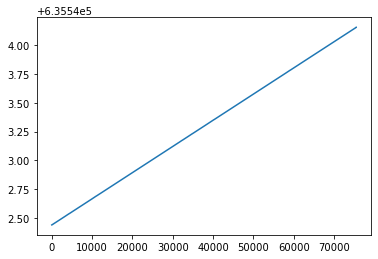

In [173]:
import matplotlib.pyplot as plt
plt.plot(sine.when)

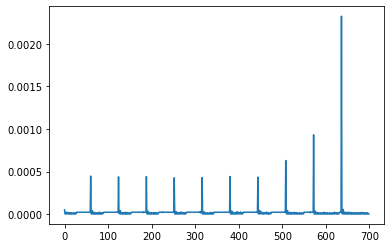

In [182]:
plt.plot([sine.when[j+1] - sine.when[j] for j in range(len(sine.when) - 1)][-700:])

In [163]:
512/framerate*1000

11.609977324263038